# Horror Movie Rating

If you are working on your own local computer, dont forget to first so that we can do the work on this notebook

In [ ]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import re 
import numpy as np
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

WEB SCRAPING

In [71]:
def getAndParseURL(url):
    result = requests.get(url)
    soup=bts(result.text,'html.parser')
    return soup

In [72]:
PAGE_NUM = ["https://www.imdb.com/search/title/?genres=horror&explore=title_type,genres&title_type=movie&ref_=adv_explore_rhs"]
def find_page_num():
    for i in range(51,4000,50):
        PAGE_NUM.append("https://www.imdb.com/search/title/?title_type=movie&genres=horror&start="+str(i)+"&explore=title_type,genres&ref_=adv_nxt")
    return PAGE_NUM
find_page_num()

['https://www.imdb.com/search/title/?genres=horror&explore=title_type,genres&title_type=movie&ref_=adv_explore_rhs',
 'https://www.imdb.com/search/title/?title_type=movie&genres=horror&start=51&explore=title_type,genres&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=movie&genres=horror&start=101&explore=title_type,genres&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=movie&genres=horror&start=151&explore=title_type,genres&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=movie&genres=horror&start=201&explore=title_type,genres&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=movie&genres=horror&start=251&explore=title_type,genres&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=movie&genres=horror&start=301&explore=title_type,genres&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=movie&genres=horror&start=351&explore=title_type,genres&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?title_type=mov

In [73]:
len(PAGE_NUM)

40

In [74]:
ALL_PRODUCT = []
def all_product():
    for i in PAGE_NUM:
        html = getAndParseURL(i)
        for sonuc in html.findAll('h3', attrs={'class' : 'lister-item-header'}):
            ALL_PRODUCT.append("https://www.imdb.com" + sonuc.a["href"])
    return ALL_PRODUCT
all_product()

['https://www.imdb.com/title/tt10954984/',
 'https://www.imdb.com/title/tt7144666/',
 'https://www.imdb.com/title/tt9419884/',
 'https://www.imdb.com/title/tt9639470/',
 'https://www.imdb.com/title/tt19623240/',
 'https://www.imdb.com/title/tt6920084/',
 'https://www.imdb.com/title/tt13560574/',
 'https://www.imdb.com/title/tt18968540/',
 'https://www.imdb.com/title/tt8110652/',
 'https://www.imdb.com/title/tt13841850/',
 'https://www.imdb.com/title/tt11851548/',
 'https://www.imdb.com/title/tt5052448/',
 'https://www.imdb.com/title/tt11866324/',
 'https://www.imdb.com/title/tt14813212/',
 'https://www.imdb.com/title/tt14549466/',
 'https://www.imdb.com/title/tt10665342/',
 'https://www.imdb.com/title/tt5108870/',
 'https://www.imdb.com/title/tt0120804/',
 'https://www.imdb.com/title/tt8772262/',
 'https://www.imdb.com/title/tt6857112/',
 'https://www.imdb.com/title/tt12004038/',
 'https://www.imdb.com/title/tt0144084/',
 'https://www.imdb.com/title/tt1396484/',
 'https://www.imdb.com/

In [87]:
len(ALL_PRODUCT)

2000

In [88]:
result=[]
html2 = getAndParseURL("https://www.imdb.com/title/tt7144666/")
film_ad=html2.find("div", {"class":"sc-94726ce4-2 khmuXj"}).h1.text
film_yil=html2.find("div", {"class":"sc-94726ce4-3 eSKKHi"}).span.text
film_yas_siniri=html2.find("span", {"class":"sc-8c396aa2-2 itZqyK"}).findNext().span.text
imdb_puani=html2.find("div", {"class":"sc-7ab21ed2-2 kYEdvH"}).text.replace("/10","")
imdb_puan_sayisi=html2.find("div", {"class":"sc-7ab21ed2-3 dPVcnq"}).text
if imdb_puan_sayisi[-1]=='K':
    imdb_puan_sayisi=float(imdb_puan_sayisi.strip('K'))*1000
elif imdb_puan_sayisi[-1]=='M':
    imdb_puan_sayisi=float(imdb_puan_sayisi.replace('M',''))*1000000
else: 
    imdb_puan_sayisi=float(imdb_puan_sayisi)
populerlik=html2.find("div", {"class":"sc-edc76a2-1 gopMqI"}).text
yonetmen=html2.find("a", {"class":"ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"}).text
yorum_yapan_sayisi=html2.find("span", {"class":"score"}).text
yorum_yapan_sayisi=float(yorum_yapan_sayisi.strip('K'))*1000 if yorum_yapan_sayisi[-1]=='K' else float(yorum_yapan_sayisi)
metascore=html2.find("span", {"class":"score-meta"}).text
ulke=html2.find("li", {"data-testid":"title-details-origin"}).a.text
film_dil=html2.find("li", {"data-testid":"title-details-languages"}).a.text
studyo=html2.find("li", {"data-testid":"title-details-companies"}).findNext().findNext().a.text
butce=html2.find("li", {"data-testid":"title-boxoffice-budget"}).li.text.replace('(estimated)','').strip('$').strip()
hasilat=html2.find("li", {"data-testid":"title-boxoffice-cumulativeworldwidegross"}).li.text.strip('$')
result.append([film_ad,film_yil,film_yas_siniri,imdb_puani,imdb_puan_sayisi,populerlik,yonetmen,yorum_yapan_sayisi,metascore,ulke,film_dil,studyo,butce,hasilat])
result

[['The Black Phone',
  '2021',
  '16+',
  '7.0',
  63000.0,
  '4',
  'Scott Derrickson',
  914.0,
  '65',
  'United States',
  'English',
  'Universal Pictures',
  '18,000,000',
  '132,073,245']]

In [89]:
result=[]
i=0
#ALL_PRODUCT
for link in ALL_PRODUCT:
    html2=getAndParseURL(link)
    try:
        film_ad=html2.find("div", {"class":"sc-94726ce4-2 khmuXj"}).h1.text
    except:
        fiml_ad=np.nan
    try:
        film_yil=html2.find("div", {"class":"sc-94726ce4-3 eSKKHi"}).span.text
    except:
        film_yil=np.nan
    try:
        film_yas_siniri=html2.find("span", {"class":"sc-8c396aa2-2 itZqyK"}).findNext().span.text
    except:
        film_yas_siniri=np.nan
    try:
        imdb_puani=html2.find("div", {"class":"sc-7ab21ed2-2 kYEdvH"}).text.replace("/10","")
    except:
        imdb_puani=np.nan
    try:
        imdb_puan_sayisi=html2.find("div", {"class":"sc-7ab21ed2-3 dPVcnq"}).text
        if imdb_puan_sayisi[-1]=='K':
            imdb_puan_sayisi=float(imdb_puan_sayisi.strip('K'))*1000
        elif imdb_puan_sayisi[-1]=='M':
            imdb_puan_sayisi=float(imdb_puan_sayisi.replace('M',''))*1000000
        else: 
            imdb_puan_sayisi=float(imdb_puan_sayisi)
    except:
        imdb_puan_sayisi=np.nan
    try:
        populerlik=html2.find("div", {"class":"sc-edc76a2-1 gopMqI"}).text
    except:
        populerlik=np.nan
    try:
        yonetmen=html2.find("a", {"class":"ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"}).text
    except:
        yonetmen=np.nan
    try:
        yorum_yapan_sayisi=html2.find("span", {"class":"score"}).text
        yorum_yapan_sayisi=float(yorum_yapan_sayisi.strip('K'))*1000 if yorum_yapan_sayisi[-1]=='K' else float(yorum_yapan_sayisi)
    except:
        yorum_yapan_sayisi=np.nan
    try:
        metascore=html2.find("span", {"class":"score-meta"}).text
    except:
        metascore=np.nan
    try:
        ulke=html2.find("li", {"data-testid":"title-details-origin"}).a.text
    except:
        ulke=np.nan
    try:
        film_dil=html2.find("li", {"data-testid":"title-details-languages"}).a.text
    except:
        film_dil=np.nan
    try:
        studyo=html2.find("li", {"data-testid":"title-details-companies"}).findNext().findNext().a.text
    except:
        studyo=np.nan
    try:
        butce=html2.find("li", {"data-testid":"title-boxoffice-budget"}).li.text.replace('(estimated)','').strip('$').strip()
    except:
        butce=np.nan
    try:
        hasilat=html2.find("li", {"data-testid":"title-boxoffice-cumulativeworldwidegross"}).li.text.strip('$')
    except:
        hasilat=np.nan        
    i=i+1
    print(i)
    result.append([film_ad,film_yil,film_yas_siniri,imdb_puani,imdb_puan_sayisi,populerlik,yonetmen,yorum_yapan_sayisi,metascore,ulke,film_dil,studyo,butce,hasilat])

columns=["FİLM AD","YAPIM YILI","YAŞ SINIRI","IMDB PUANI","IMDB PUANLAMA SAYISI","POPÜLERLİK","YÖNETMEN","YORUM SAYISI","METASCORE","ÜLKE","DİLİ","YAPIMCI STÜDYO","BÜTÇE","HASILAT"]
df=pd.DataFrame.from_records(result,columns=columns)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FİLM AD               2000 non-null   object 
 1   YAPIM YILI            1965 non-null   object 
 2   YAŞ SINIRI            1764 non-null   object 
 3   IMDB PUANI            1912 non-null   object 
 4   IMDB PUANLAMA SAYISI  1912 non-null   float64
 5   POPÜLERLİK            1999 non-null   object 
 6   YÖNETMEN              2000 non-null   object 
 7   YORUM SAYISI          1918 non-null   float64
 8   METASCORE             1233 non-null   object 
 9   ÜLKE                  1993 non-null   object 
 10  DİLİ                  1975 non-null   object 
 11  YAPIMCI STÜDYO        1976 non-null   object 
 12  BÜTÇE                 1121 non-null   object 
 13  HASILAT               1278 non-null   object 
dtypes: float64(2), object(12)
memory usage: 218.9+ KB


In [28]:
#######################################################################

In [91]:
df.head()

,FİLM AD,YAPIM YILI,YAŞ SINIRI,IMDB PUANI,IMDB PUANLAMA SAYISI,POPÜLERLİK,YÖNETMEN,YORUM SAYISI,METASCORE,ÜLKE,DİLİ,YAPIMCI STÜDYO,BÜTÇE,HASILAT
0,Nope,2022,R,7.5,17000.0,3,Jordan Peele,495.0,77,United States,English,Monkeypaw Productions,"68,000,000","62,033,425"
1,The Black Phone,2021,16+,7.0,63000.0,4,Scott Derrickson,914.0,65,United States,English,Universal Pictures,"18,000,000","132,073,245"
2,Doctor Strange in the Multiverse of Madness,2022,13+,7.0,331000.0,13,Sam Raimi,3700.0,60,United States,English,Marvel Studios,"200,000,000","954,513,533"
3,Last Night in Soho,2021,16+,7.1,120000.0,25,Edgar Wright,965.0,65,United Kingdom,English,Focus Features International (FFI),"43,000,000","22,957,625"
4,Winnie-The-Pooh: Blood and Honey,NaN,NaN,NaN,NaN,26,Rhys Frake-Waterfield,NaN,NaN,United Kingdom,English,Jagged Edge Productions,NaN,NaN


In [92]:
#Dict is saved as a pickle because it takes a long time to load.
with open('saved_df.pkl', 'wb') as f:
    pickle.dump(df, f)

In [58]:
with open('saved_df.pkl', 'rb') as f:
    loaded_df = pickle.load(f)

In [59]:
#Discarding NULL values
loaded_df.dropna(subset=["IMDB PUANI","BÜTÇE","HASILAT"],inplace=True)

In [60]:
loaded_df.head()

,FİLM AD,YAPIM YILI,YAŞ SINIRI,IMDB PUANI,IMDB PUANLAMA SAYISI,POPÜLERLİK,YÖNETMEN,YORUM SAYISI,METASCORE,ÜLKE,DİLİ,YAPIMCI STÜDYO,BÜTÇE,HASILAT
0,Nope,2022,R,7.5,17000.0,3,Jordan Peele,495.0,77,United States,English,Monkeypaw Productions,"68,000,000","62,033,425"
1,The Black Phone,2021,16+,7.0,63000.0,4,Scott Derrickson,914.0,65,United States,English,Universal Pictures,"18,000,000","132,073,245"
2,Doctor Strange in the Multiverse of Madness,2022,13+,7.0,331000.0,13,Sam Raimi,3700.0,60,United States,English,Marvel Studios,"200,000,000","954,513,533"
3,Last Night in Soho,2021,16+,7.1,120000.0,25,Edgar Wright,965.0,65,United Kingdom,English,Focus Features International (FFI),"43,000,000","22,957,625"
5,Resident Evil: Welcome to Raccoon City,2021,16+,5.2,50000.0,29,Johannes Roberts,1200.0,44,Canada,English,Constantin Film,"25,000,000","38,600,612"


In [61]:
loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FİLM AD               866 non-null    object 
 1   YAPIM YILI            866 non-null    object 
 2   YAŞ SINIRI            858 non-null    object 
 3   IMDB PUANI            866 non-null    object 
 4   IMDB PUANLAMA SAYISI  866 non-null    float64
 5   POPÜLERLİK            866 non-null    object 
 6   YÖNETMEN              866 non-null    object 
 7   YORUM SAYISI          866 non-null    float64
 8   METASCORE             764 non-null    object 
 9   ÜLKE                  866 non-null    object 
 10  DİLİ                  866 non-null    object 
 11  YAPIMCI STÜDYO        864 non-null    object 
 12  BÜTÇE                 866 non-null    object 
 13  HASILAT               866 non-null    object 
dtypes: float64(2), object(12)
memory usage: 101.5+ KB


In [62]:
loaded_df.shape

(866, 14)

In [63]:
loaded_df.drop_duplicates(inplace=True)

In [64]:
loaded_df["YAPIM YILI"].value_counts()

2018    37
2019    36
2016    36
2005    32
2010    31
        ..
1932     1
1958     1
1968     1
1974     1
1957     1
Name: YAPIM YILI, Length: 68, dtype: int64

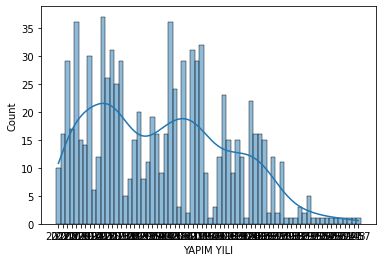

In [65]:
sns.histplot(data = loaded_df['YAPIM YILI'], kde=True);

In [66]:
loaded_df['YAPIM YILI']=loaded_df['YAPIM YILI'].astype(int)
loaded_df['YAPIM YILI'] = np.log(loaded_df["YAPIM YILI"])

In [67]:
loaded_df["YAŞ SINIRI"].isna().sum()

8

In [68]:
loaded_df["YAŞ SINIRI"].fillna("Unknown", inplace=True)

In [69]:
loaded_df["YAŞ SINIRI"].value_counts()

R            321
18+          146
15+          113
PG-13         89
Not Rated     56
13+           47
16+           23
PG            18
Unknown        8
TV-MA          7
Unrated        6
15A            6
G              5
Passed         5
13A            4
7+             3
7A             2
Approved       2
10A            1
TV-14          1
GP             1
NC-17          1
YETİŞKİN       1
Name: YAŞ SINIRI, dtype: int64

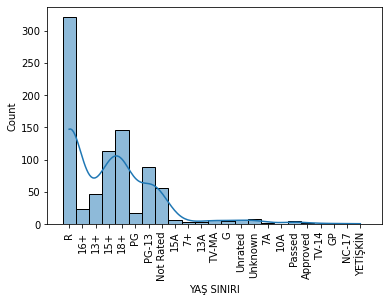

In [70]:
sns.histplot(data = loaded_df['YAŞ SINIRI'], kde=True)
plt.tick_params(axis='x', rotation=90)

In [71]:
loaded_df["IMDB PUANI"].value_counts()

5.8    49
6.2    47
6.0    38
6.4    37
6.5    37
5.9    35
6.1    34
5.6    32
5.5    32
5.2    31
6.3    30
6.7    27
5.4    27
5.0    26
6.6    24
5.7    23
6.8    23
5.3    21
7.1    20
7.3    19
4.8    19
7.4    18
5.1    17
4.6    17
7.2    17
7.0    17
7.6    16
6.9    15
4.7    14
7.5    13
4.5    10
4.9     9
4.2     6
7.8     6
4.1     6
4.3     6
3.7     6
4.0     5
3.4     4
7.7     4
7.9     4
3.9     4
4.4     3
8.5     2
2.9     2
8.0     2
3.3     2
3.0     1
8.2     1
3.2     1
8.4     1
2.6     1
3.8     1
8.1     1
3.6     1
2.1     1
2.4     1
Name: IMDB PUANI, dtype: int64

In [72]:
loaded_df["IMDB PUANI"]=loaded_df["IMDB PUANI"].apply(lambda x: float(x))

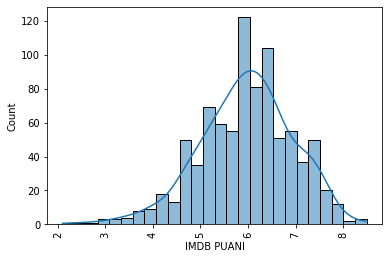

In [73]:
sns.histplot(data = loaded_df['IMDB PUANI'], kde=True)
plt.tick_params(axis='x', rotation=90)

In [74]:
loaded_df["IMDB PUANLAMA SAYISI"].value_counts()

17000.0     18
12000.0     16
18000.0     16
23000.0     14
15000.0     14
            ..
256000.0     1
148000.0     1
84000.0      1
266000.0     1
6800.0       1
Name: IMDB PUANLAMA SAYISI, Length: 278, dtype: int64

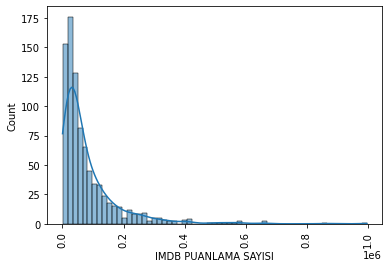

In [75]:
sns.histplot(data = loaded_df['IMDB PUANLAMA SAYISI'], kde=True)
plt.tick_params(axis='x', rotation=90)

In [76]:
loaded_df["IMDB PUANLAMA SAYISI"]=np.log(loaded_df["IMDB PUANLAMA SAYISI"])

In [77]:
loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FİLM AD               866 non-null    object 
 1   YAPIM YILI            866 non-null    float64
 2   YAŞ SINIRI            866 non-null    object 
 3   IMDB PUANI            866 non-null    float64
 4   IMDB PUANLAMA SAYISI  866 non-null    float64
 5   POPÜLERLİK            866 non-null    object 
 6   YÖNETMEN              866 non-null    object 
 7   YORUM SAYISI          866 non-null    float64
 8   METASCORE             764 non-null    object 
 9   ÜLKE                  866 non-null    object 
 10  DİLİ                  866 non-null    object 
 11  YAPIMCI STÜDYO        864 non-null    object 
 12  BÜTÇE                 866 non-null    object 
 13  HASILAT               866 non-null    object 
dtypes: float64(4), object(10)
memory usage: 101.5+ KB


In [78]:
loaded_df["POPÜLERLİK"].value_counts()

3         1
6,656     1
6,503     1
6,506     1
6,519     1
         ..
3,037     1
3,043     1
3,080     1
3,081     1
13,458    1
Name: POPÜLERLİK, Length: 866, dtype: int64

In [79]:
loaded_df["POPÜLERLİK"]=loaded_df["POPÜLERLİK"].str.replace(",","")
loaded_df["POPÜLERLİK"]=loaded_df["POPÜLERLİK"].apply(lambda x: float(x))

In [80]:
loaded_df['POPÜLERLİK'] = np.log(loaded_df.POPÜLERLİK)

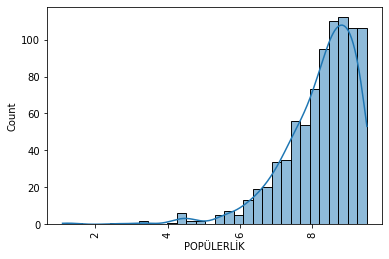

In [81]:
sns.histplot(data = loaded_df['POPÜLERLİK'], kde=True)
plt.tick_params(axis='x', rotation=90)

In [82]:
loaded_df["YORUM SAYISI"].value_counts()

1000.0    14
1200.0    12
1300.0    10
1100.0     9
176.0      9
          ..
450.0      1
99.0       1
438.0      1
536.0      1
202.0      1
Name: YORUM SAYISI, Length: 484, dtype: int64

In [83]:
loaded_df['YORUM SAYISI'] = np.log(loaded_df["YORUM SAYISI"])

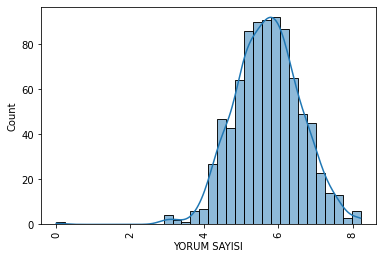

In [84]:
sns.histplot(data = loaded_df['YORUM SAYISI'], kde=True)
plt.tick_params(axis='x', rotation=90)

In [85]:
loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FİLM AD               866 non-null    object 
 1   YAPIM YILI            866 non-null    float64
 2   YAŞ SINIRI            866 non-null    object 
 3   IMDB PUANI            866 non-null    float64
 4   IMDB PUANLAMA SAYISI  866 non-null    float64
 5   POPÜLERLİK            866 non-null    float64
 6   YÖNETMEN              866 non-null    object 
 7   YORUM SAYISI          866 non-null    float64
 8   METASCORE             764 non-null    object 
 9   ÜLKE                  866 non-null    object 
 10  DİLİ                  866 non-null    object 
 11  YAPIMCI STÜDYO        864 non-null    object 
 12  BÜTÇE                 866 non-null    object 
 13  HASILAT               866 non-null    object 
dtypes: float64(5), object(9)
memory usage: 101.5+ KB


In [86]:
loaded_df["METASCORE"].value_counts()

30    21
42    20
55    19
49    19
34    19
      ..
14     1
92     1
13     1
97     1
88     1
Name: METASCORE, Length: 83, dtype: int64

In [87]:
loaded_df["METASCORE"].isna().sum()

102

In [88]:
loaded_df["METASCORE"]=loaded_df["METASCORE"].apply(lambda x: float(x))

In [89]:
loaded_df['METASCORE'] = np.log(loaded_df.METASCORE)

In [90]:
def mean_std_filling(column_name):    
    mean = column_name.mean()
    std = column_name.std()
    is_null = column_name.isna().sum()
    print('Mean:', mean, 'Std:', std, 'Null:', is_null)

    # Elimizdeki dizinin aritmetik ortalama ve standart sapma değerlerini kullanarak rastgele float veriler üretme
    rand_float = np.random.uniform(mean - std, mean + std, size = is_null)
    print('Numbers:', rand_float[:25])

    # Oluşturduğumuz sayılarla boş değerlerimizi doldurma
    column_name[np.isnan(column_name)] = rand_float
    column_name = column_name.astype(float)

In [91]:
mean_std_filling(loaded_df["METASCORE"])

Mean: 3.829620031680976 Std: 0.4055348439159357 Null: 102
Numbers: [3.48509778 3.69926563 3.52551291 4.05497483 3.83717953 3.98614598
 3.96732501 3.58486188 3.49231777 3.72099919 3.77100274 3.6143331
 4.23213471 4.04363194 4.18534944 4.12155889 4.14410694 3.48072045
 3.55243772 3.98632655 4.18162661 3.51792782 3.64851086 3.79588433
 3.81857109]


In [92]:
loaded_df["METASCORE"].isna().sum()

0

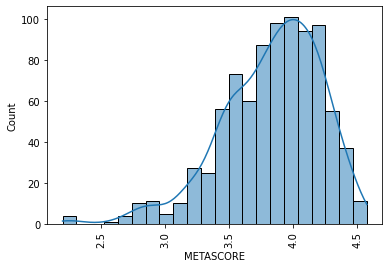

In [93]:
sns.histplot(data = loaded_df['METASCORE'], kde=True)
plt.tick_params(axis='x', rotation=90)

In [94]:
loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FİLM AD               866 non-null    object 
 1   YAPIM YILI            866 non-null    float64
 2   YAŞ SINIRI            866 non-null    object 
 3   IMDB PUANI            866 non-null    float64
 4   IMDB PUANLAMA SAYISI  866 non-null    float64
 5   POPÜLERLİK            866 non-null    float64
 6   YÖNETMEN              866 non-null    object 
 7   YORUM SAYISI          866 non-null    float64
 8   METASCORE             866 non-null    float64
 9   ÜLKE                  866 non-null    object 
 10  DİLİ                  866 non-null    object 
 11  YAPIMCI STÜDYO        864 non-null    object 
 12  BÜTÇE                 866 non-null    object 
 13  HASILAT               866 non-null    object 
dtypes: float64(6), object(8)
memory usage: 101.5+ KB


In [95]:
loaded_df["DİLİ"].value_counts()

English                   797
Spanish                    22
French                     13
Japanese                    6
Korean                      5
Norwegian                   5
Italian                     3
Russian                     3
German                      2
Hungarian                   2
Swedish                     1
American Sign Language      1
Finnish                     1
Czech                       1
Indonesian                  1
Arabic                      1
Dutch                       1
Estonian                    1
Name: DİLİ, dtype: int64

In [96]:
loaded_df["YAPIMCI STÜDYO"].value_counts()

Universal Pictures        53
New Line Cinema           42
Paramount Pictures        32
Dimension Films           31
Columbia Pictures         25
                          ..
Fusion Films (II)          1
Luc Besson Production      1
Hammerhead Productions     1
Centurion                  1
TIK Films                  1
Name: YAPIMCI STÜDYO, Length: 451, dtype: int64

In [97]:
loaded_df["YAPIMCI STÜDYO"].isna().sum()

2

In [98]:
loaded_df["YAPIMCI STÜDYO"].fillna("Unknown", inplace=True)

In [99]:
loaded_df["BÜTÇE"]=loaded_df["BÜTÇE"].str.replace(",","").str.replace('€','').str.replace("HK","").str.replace('£','').str.replace('₩','',regex=True).str.replace('A','',regex=True).str.replace('C','').str.replace('¥','')
loaded_df["BÜTÇE"]=loaded_df["BÜTÇE"].str.replace("IDR","",regex=True).str.replace("DEM","").str.replace("NZ","",regex=True).str.replace("ITL","",regex=True).str.replace('RUR','').str.replace('ZK','').str.replace('SEK','')
loaded_df["BÜTÇE"]=loaded_df["BÜTÇE"].str.replace('CA','').str.replace("SGD","").str.replace("MX","").str.replace("HUF","").str.replace('NT','',regex=True).str.replace('$','',regex=True).str.replace('NOK','',regex=True).apply(lambda x: float(x))

In [100]:
loaded_df['BÜTÇE'] = np.log(loaded_df.BÜTÇE)

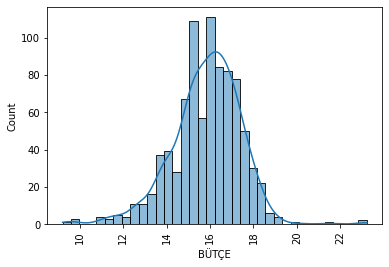

In [101]:
sns.histplot(data = loaded_df['BÜTÇE'], kde=True)
plt.tick_params(axis='x', rotation=90)

In [102]:
loaded_df["HASILAT"].value_counts()

62,033,425     1
48,555,306     1
29,874,280     1
647,839        1
127,369,981    1
              ..
6,318,409      1
850,419        1
44,793,222     1
60,922,980     1
74,827,344     1
Name: HASILAT, Length: 866, dtype: int64

In [103]:
loaded_df["HASILAT"]=loaded_df["HASILAT"].str.replace(",","").astype(float)

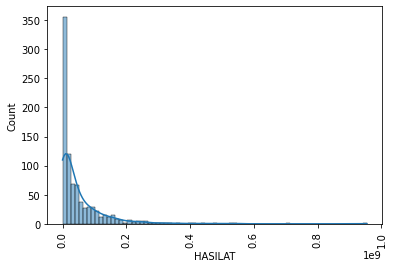

In [104]:
sns.histplot(data = loaded_df['HASILAT'], kde=True)
plt.tick_params(axis='x', rotation=90)

In [105]:
loaded_df['HASILAT'] = np.log(loaded_df.HASILAT)

In [106]:
loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FİLM AD               866 non-null    object 
 1   YAPIM YILI            866 non-null    float64
 2   YAŞ SINIRI            866 non-null    object 
 3   IMDB PUANI            866 non-null    float64
 4   IMDB PUANLAMA SAYISI  866 non-null    float64
 5   POPÜLERLİK            866 non-null    float64
 6   YÖNETMEN              866 non-null    object 
 7   YORUM SAYISI          866 non-null    float64
 8   METASCORE             866 non-null    float64
 9   ÜLKE                  866 non-null    object 
 10  DİLİ                  866 non-null    object 
 11  YAPIMCI STÜDYO        866 non-null    object 
 12  BÜTÇE                 866 non-null    float64
 13  HASILAT               866 non-null    float64
dtypes: float64(8), object(6)
memory usage: 101.5+ KB


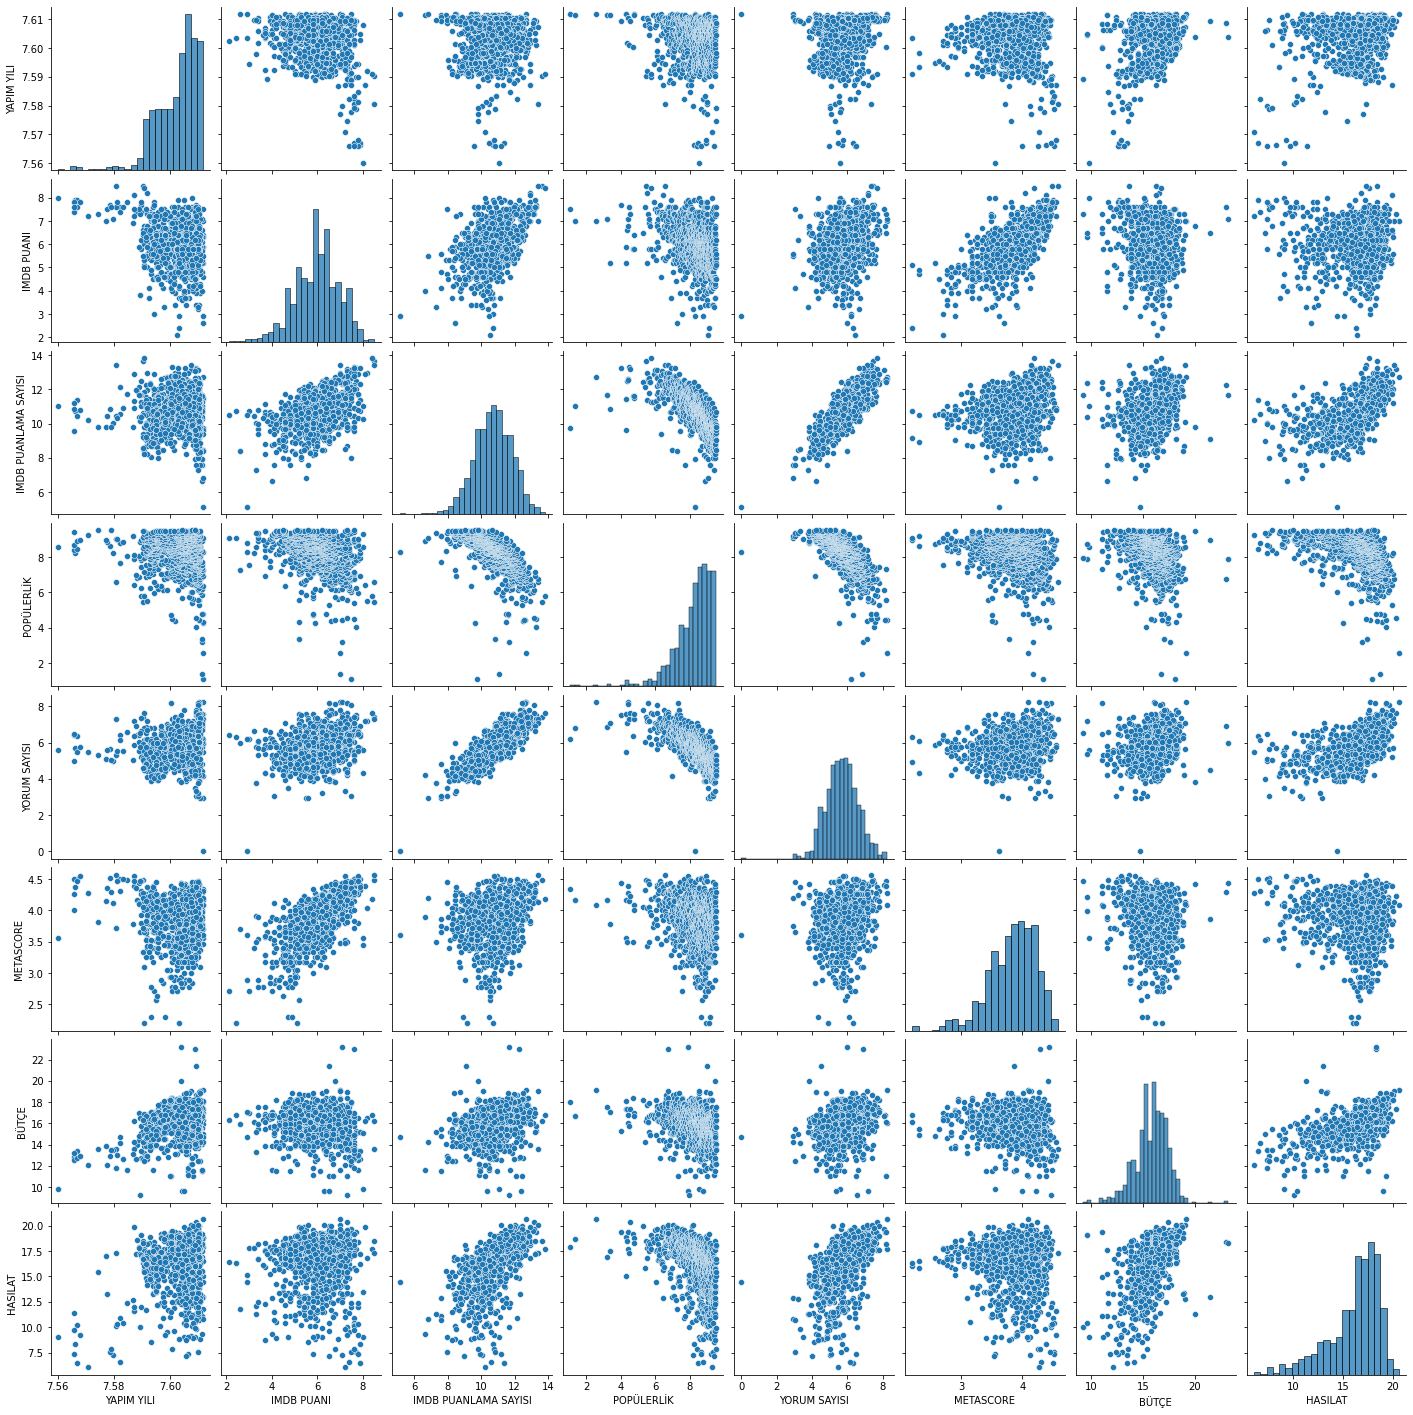

In [107]:
sns.pairplot(loaded_df);

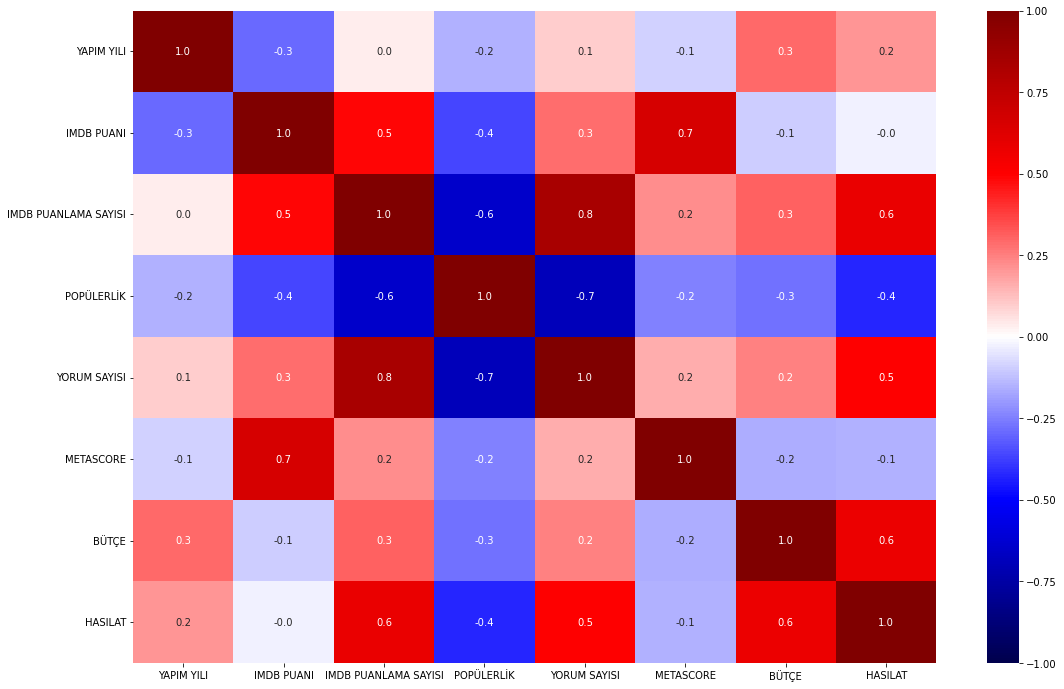

In [108]:
plt.figure(figsize=[18,12])
sns.heatmap(loaded_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.1f');

In [109]:
loaded_df.head()

,FİLM AD,YAPIM YILI,YAŞ SINIRI,IMDB PUANI,IMDB PUANLAMA SAYISI,POPÜLERLİK,YÖNETMEN,YORUM SAYISI,METASCORE,ÜLKE,DİLİ,YAPIMCI STÜDYO,BÜTÇE,HASILAT
0,Nope,7.611842,R,7.5,9.740969,1.098612,Jordan Peele,6.204558,4.343805,United States,English,Monkeypaw Productions,18.035018,17.943184
1,The Black Phone,7.611348,16+,7.0,11.050890,1.386294,Scott Derrickson,6.817831,4.174387,United States,English,Universal Pictures,16.705882,18.698867
2,Doctor Strange in the Multiverse of Madness,7.611842,13+,7.0,12.709874,2.564949,Sam Raimi,8.216088,4.094345,United States,English,Marvel Studios,19.113828,20.676712
3,Last Night in Soho,7.611348,16+,7.1,11.695247,3.218876,Edgar Wright,6.872128,4.174387,United Kingdom,English,Focus Features International (FFI),17.576711,16.949161
5,Resident Evil: Welcome to Raccoon City,7.611348,16+,5.2,10.819778,3.367296,Johannes Roberts,7.090077,3.784190,Canada,English,Constantin Film,17.034386,17.468779


In [110]:
loaded_df.head()

,FİLM AD,YAPIM YILI,YAŞ SINIRI,IMDB PUANI,IMDB PUANLAMA SAYISI,POPÜLERLİK,YÖNETMEN,YORUM SAYISI,METASCORE,ÜLKE,DİLİ,YAPIMCI STÜDYO,BÜTÇE,HASILAT
0,Nope,7.611842,R,7.5,9.740969,1.098612,Jordan Peele,6.204558,4.343805,United States,English,Monkeypaw Productions,18.035018,17.943184
1,The Black Phone,7.611348,16+,7.0,11.050890,1.386294,Scott Derrickson,6.817831,4.174387,United States,English,Universal Pictures,16.705882,18.698867
2,Doctor Strange in the Multiverse of Madness,7.611842,13+,7.0,12.709874,2.564949,Sam Raimi,8.216088,4.094345,United States,English,Marvel Studios,19.113828,20.676712
3,Last Night in Soho,7.611348,16+,7.1,11.695247,3.218876,Edgar Wright,6.872128,4.174387,United Kingdom,English,Focus Features International (FFI),17.576711,16.949161
5,Resident Evil: Welcome to Raccoon City,7.611348,16+,5.2,10.819778,3.367296,Johannes Roberts,7.090077,3.784190,Canada,English,Constantin Film,17.034386,17.468779


In [111]:
loaded_df = pd.get_dummies(loaded_df, columns=['YÖNETMEN','YAŞ SINIRI','ÜLKE','DİLİ','YAPIMCI STÜDYO'], drop_first=True)
loaded_df

,FİLM AD,YAPIM YILI,IMDB PUANI,IMDB PUANLAMA SAYISI,POPÜLERLİK,YORUM SAYISI,METASCORE,BÜTÇE,HASILAT,YÖNETMEN_Adam Gierasch,...,YAPIMCI STÜDYO_Walt Disney Pictures,YAPIMCI STÜDYO_Warner Bros.,YAPIMCI STÜDYO_Warp X,YAPIMCI STÜDYO_White Lair,YAPIMCI STÜDYO_WingNut Films,YAPIMCI STÜDYO_World Wrestling Entertainment (WWE),YAPIMCI STÜDYO_Worldview Entertainment,YAPIMCI STÜDYO_Xanadeux,YAPIMCI STÜDYO_Zentropa Entertainments,YAPIMCI STÜDYO_thefyzz
0,Nope,7.611842,7.5,9.740969,1.098612,6.204558,4.343805,18.035018,17.943184,0,...,0,0,0,0,0,0,0,0,0,0
1,The Black Phone,7.611348,7.0,11.050890,1.386294,6.817831,4.174387,16.705882,18.698867,0,...,0,0,0,0,0,0,0,0,0,0
2,Doctor Strange in the Multiverse of Madness,7.611842,7.0,12.709874,2.564949,8.216088,4.094345,19.113828,20.676712,0,...,0,0,0,0,0,0,0,0,0,0
3,Last Night in Soho,7.611348,7.1,11.695247,3.218876,6.872128,4.174387,17.576711,16.949161,0,...,0,0,0,0,0,0,0,0,0,0
5,Resident Evil: Welcome to Raccoon City,7.611348,5.2,10.819778,3.367296,7.090077,3.784190,17.034386,17.468779,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,The Quiet Ones,7.607878,5.1,9.903488,9.499421,4.795791,3.713572,12.206073,16.696682,0,...,0,0,0,0,0,0,0,0,0,0
1988,I Am Not a Serial Killer,7.608871,6.2,9.615805,9.501965,4.406719,3.988984,14.042224,9.959301,0,...,0,0,0,0,0,0,0,0,0,0
1992,Bud Abbott and Lou Costello Meet Frankenstein,7.574558,7.3,9.798127,9.504650,5.308268,3.822111,13.592367,15.386716,0,...,0,0,0,0,0,0,0,0,0,0
1996,The Incredible Shrinking Man,7.579168,7.6,9.798127,9.506363,5.023881,4.290459,13.527828,7.855545,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
X = loaded_df.drop(columns=['FİLM AD','IMDB PUANI'])
y = loaded_df["IMDB PUANI"]


X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

Creating the 3 models that we will use for the validation phase (model selection)

In [ ]:
# Lineer Regresyon
lm = LinearRegression()

In [ ]:
# Ridge Regresyon
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train.values)
X_val_scaled = scaler.transform(x_cv.values)
X_test_scaled = scaler.transform(x_test.values)

lm_reg = Ridge(alpha=1)

In [113]:
# Polinomal Regresyon
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(x_train.values)
X_val_poly = poly.transform(x_cv.values)
X_test_poly = poly.transform(x_test.values)

lm_poly = LinearRegression()

In [114]:
# Validation results
lm.fit(x_train, y_train)
print(f'Linear Regression val R^2: {lm.score(x_cv, y_cv):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_cv):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_cv):.3f}')

Linear Regression val R^2: -6900525850316314624.000
Ridge Regression val R^2: 0.137
Degree 2 polynomial regression val R^2: 0.226


In [115]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X, y)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [116]:
model.alpha_

0.0012516946895952646

In [117]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.001, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", ridgeReg.score(x_cv, y_cv))
print("Test Score: ", ridgeReg.score(x_test, y_test))
print("MSE: ", mse)

Validation Score:  0.05101105408750284
Test Score:  0.27802286852171587
MSE:  0.9978566923678219


In [118]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.001, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_cv)

mse = np.mean((pred - y_cv)**2)

print("Validation Score: ", lassoReg.score(x_cv, y_cv))
print("Test Score: ", lassoReg.score(x_test, y_test))
print("MSE: ", mse)

Validation Score:  0.6216931030888815
Test Score:  0.7544112246862722
MSE:  0.3977876354383488
